# **Assignment 4**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [0]:
NAME = "Vidya Jayaraman"
STUDENT_ID = "1620208"

#  Image Classification
## Building a Convolutional Neural Network [CNN] from Scratch

In this exercise, we will build a classifier model that is able to distinguish between 10 different classes of images - airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. We will follow these steps:

1. Explore the example data
2. Build a small convnet to solve our classification problem
3. Evaluate training and validation accuracy

###  Data Exploration and Preparation

We'll start by downloading the CIFAR-10 dataset from Keras.

This is a link to the dataset documentation:
https://keras.io/datasets/#cifar10-small-image-classification

And a link to the dataset source:
https://www.cs.toronto.edu/~kriz/cifar.html

Be sure to set your Runtime environment to include a GPU, as it will speed up the training considerably (this time that's important!).

#### Loading data into local variables

In [0]:
from keras.datasets import cifar10

# Fetch the data:
(X, y), (_, _) = cifar10.load_data()

####  Import needed functions and libraries

In [0]:
# Ignore the warnings - Otherwise, TensorFlow tends to innundate one with far too many warnings.
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# For matrix operations and dataframes.
import numpy as np

# Data visualizaton.
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random as rn
 
# Configure some defaults.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Useful deep learning functions.
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D


# Powerful deep learning module.
import tensorflow as tf

# For dealing with data.
import numpy as np  

#### Data Preparation & Exploration

Let's take a look at a few of these images. Rerun this cell multiple times to see different images for each class.

You may notice that these images look low fidelity, which is because they are! As we increase our image size, we also increase our model complexity. What's important is that our classes are still distinguishable from each other.

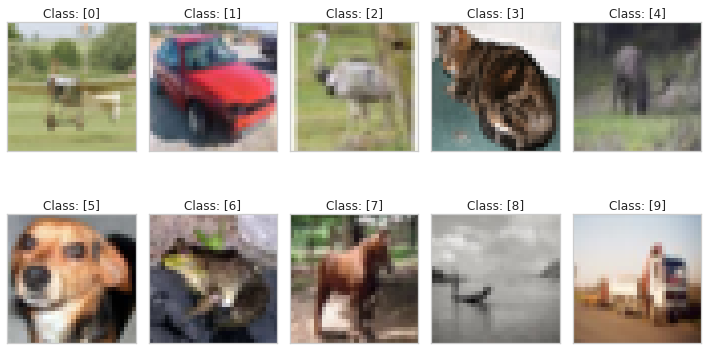

In [0]:
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 6)

for i in range(2):
    for j in range(5):
        c = j + 5*i # Class counter
        l = np.random.choice(np.where(y == c)[0], 1)[0] # Get a random image from class c
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Class: ' + str(y[l]))
        # Hide grid lines
        ax[i, j].grid(False)
        # Hide axes ticks
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        
plt.tight_layout()

#### Let's take a look at the format of our data

In [0]:
print('X (images)', X.shape)
print('y (classes)', y.shape)

X (images) (50000, 32, 32, 3)
y (classes) (50000, 1)


We can see that we have 50,000 samples, where each images is 32 by 32 pixels with 3 color channels: RGB.

For each of these images, we have a single label for which class they each belong to.

#### One hot encode the labels, and normalize the data

Similarly to previous exercises, we want to one hot encode our class labels. We also want to normalize our image data similarly to what we did in Assignment 3.

In [0]:
# One-hot encode those integer values of class labels
y = to_categorical(y, 10)

# Normalize all entries to the interval [0, 1]
X = X / 255.

### Problem 1 (a)
Create your own deep learning architecture, and train it on the dataset above. If you're unsure where to start, begin by referencing the in class exercises. 

One suggestion is to add several convolution layers each followed by a maxpooling layer. Towards the end you can add one or more fully connected layers. Dropout layers are often useful after each fully connected layer for overfitting, and you can try experimenting with that parameter. Your model should be able to reach **70% validation accuracy**.

You are responsible for your model architecture, hyperparameters, and optimizer. 

**HOWEVER, you are limited to a maximum of 50 epochs and 500,000 model parameters! You will lose points for exceeding these limits.**

In [0]:
# This is where we define the architecture of our deep neural network.
model = Sequential()

#when doing add, doing convolution block
model.add(Conv2D(filters = 16,      
                 kernel_size = (3, 3), 
                 padding = 'Same',
                 activation = 'relu', 
                 #channel being defined in first convolution, each image 28 x28
                 # only 1 channel here since gray scale, but in homework, it's 3 
                 #since rgb 
                 
                 input_shape = (32, 32, 3)))
#add pooling block
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32,      
                 kernel_size = (3, 3), 
                 padding = 'Same',
                 activation = 'relu'))
model.add(BatchNormalization())
#more convolution block
model.add(Conv2D(filters = 32,      
                 kernel_size = (3, 3), 
                 padding = 'Same',
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))
#put convolution and pooling in one input 
model.add(Flatten())
#adding dropout layers before softmax to network helps and have parameter to specify what percentage of nodes will get dropped out 
# dropout of 0.5 that drops 50% of neurons in graph and that randomizes neurons 
#connections weighted by results of training 
#dropout in one place doesnt do it for whole network- does it for only one layer
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'relu'))

# A dense layer with 10 neurons (one per class).
model.add(Dense(10, activation = "softmax"))

In [0]:
# A batch is the size of each training chunk. We're implementing batch gradient descent, which is in between
# stochastic gradient descent and full gradient descent.
batchsize = 200

# Each epoch goes through the entire training set once
epochs = 50

In [0]:
opt = RMSprop(lr = 0.001)

model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.summary()
# MAXIMUM OF 500,000 PARAMETERS!

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [0]:
history = model.fit(X, 
                    y,
                    batch_size = batchsize,
                    epochs = epochs, 
                    validation_split = 0.2, # DON'T CHANGE validation_split!
                    verbose = 1)

Epoch 1/50
200/200 [==============================] - 2s 9ms/step - loss: 1.7790 - accuracy: 0.3498 - val_loss: 2.2255 - val_accuracy: 0.3494
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 1.3868 - accuracy: 0.4952 - val_loss: 1.9646 - val_accuracy: 0.4232
Epoch 3/50
200/200 [==============================] - 1s 7ms/step - loss: 1.2181 - accuracy: 0.5648 - val_loss: 1.2953 - val_accuracy: 0.6028
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 1.1107 - accuracy: 0.6048 - val_loss: 1.5253 - val_accuracy: 0.5142
Epoch 5/50
200/200 [==============================] - 1s 7ms/step - loss: 1.0418 - accuracy: 0.6311 - val_loss: 1.2304 - val_accuracy: 0.5778
Epoch 6/50
200/200 [==============================] - 1s 7ms/step - loss: 0.9963 - accuracy: 0.6503 - val_loss: 1.0829 - val_accuracy: 0.6208
Epoch 7/50
200/200 [==============================] - 1s 7ms/step - loss: 0.9566 - accuracy: 0.6620 - val_loss: 0.9650 - val_accuracy: 0.6574
Epoch 

### Problem 1 (b)
Create training and validation loss and accuracy plots as above.

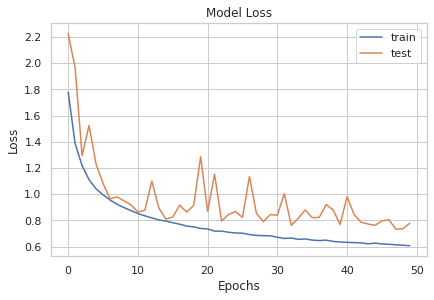

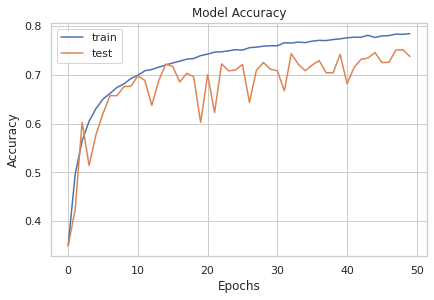

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Transfer Learning

There's a huge shortcut possible in training neural networks for recognition tasks, called transfer learning. The idea is to start with a fully trained image recognition neural network, off the shelf with  trained weights. We can repurpose the trained network for your particular recognition task, making use of the days of training that were needed to find those weights. What was learned by the neural net in it's early layers are useful features in recognizing various things in images. Keras even has pretrained models built in for this purpose. 

#### Keras Pretrained Models
        Xception
        VGG16
        VGG19
        ResNet, ResNetV2, ResNeXt
        InceptionV3
        InceptionResNetV2
        MobileNet
        MobileNetV2
        DenseNet
        NASNet

Usually one uses the layers of the pretrained model up to some point, and then creates some fully connected layers to learn the desired recognition task. The earlier layers are "frozen", and only the later layers need to be trained. We'll use VGG16, which was trained to recognize 1000 objects in ImageNet. What we're doing here for our CIFAR-10 classifier may be akin to killing a fly with a shotgun, but the same process can be used to recognize objects the original network couldn't (i.e., you could use this technique to train your computer to recognize family and friends).

In [0]:
# Some stuff we'll need...
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

Creating this pretrained network is a one line command. Notice we specified that the "top" should not be included. We aren't classifying 1000 different categories like ImageNet, so we don't include that layer. We'll add our own layer more suited to the task at hand.

We choose 224 as our image dimension because the pretrained VGG16 was trained using the ImageNet dataset which has images of this dimension.

In [0]:
# Import the VGG16 trained neural network model, minus it's last (top) neuron layer.
base_model = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (32, 32, 3), 
                   pooling = None)

58892288/58889256 [==============================] - 0s 0us/step


Let's take a look at this pretrained model:

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

Please do realize, this may be overkill for our toy recognition task. One could use this network with some layers (as we're about to add) to recognize 100 dog breeds or to recognize all your friends. If you wanted to recognize 100 dog breeds, you would use a final 100 neuron softmax for the final layer. We'll need a final softmax layer as before. First let's freeze all these pretrained weights. They are fine as they are.

In [0]:
# This freezes the weights of our VGG16 pretrained model.
for layer in base_model.layers:  
    layer.trainable = False

Now we'll add a flatten layer, a trainable dense layer, and a final softmax layer. This illustrates another way to create networks besides the sequential method we used for our example model.  This is the Keras functional approach to building networks. It's more flexible and more powerful than the sequential method. For example, it allows you to implement transfer learning.

In [0]:
# Now add layers to our pre-trained base model and add classification layers on top of it
x = base_model.output
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
predic = Dense(10, activation = 'softmax')(x) 

# And now put this all together to create our new model.
model = Model(inputs = base_model.input, outputs = predic) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

#### Initialize Training Parameters

In [0]:
# Compile the model.
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['acc'])

We can see here in the Keras docs:

https://keras.io/api/applications/vgg/#vgg16-function

that we are required to preprocess our image data in a specific way to use this pretrained model, so let's go ahead and do that.

In [0]:
(X, y), (_, _) = cifar10.load_data()
X = preprocess_input(X)
y = to_categorical(y, 10)

In [0]:
# Let's also reduce the number of training epochs.
epochs = 20
batchsize = 200



# Train the model
history = model.fit(X, 
                    y,
                    batch_size = batchsize,
                    epochs = epochs, 
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/20
200/200 [==============================] - 4s 21ms/step - loss: 2.6534 - acc: 0.4455 - val_loss: 1.3983 - val_acc: 0.5364
Epoch 2/20
200/200 [==============================] - 4s 20ms/step - loss: 1.2334 - acc: 0.5888 - val_loss: 1.2192 - val_acc: 0.5983
Epoch 3/20
200/200 [==============================] - 4s 20ms/step - loss: 1.0584 - acc: 0.6416 - val_loss: 1.1624 - val_acc: 0.6142
Epoch 4/20
200/200 [==============================] - 4s 20ms/step - loss: 0.9628 - acc: 0.6700 - val_loss: 1.1332 - val_acc: 0.6313
Epoch 5/20
200/200 [==============================] - 4s 20ms/step - loss: 0.8974 - acc: 0.6905 - val_loss: 1.1403 - val_acc: 0.6302
Epoch 6/20
200/200 [==============================] - 4s 20ms/step - loss: 0.8515 - acc: 0.7043 - val_loss: 1.1350 - val_acc: 0.6361
Epoch 7/20
200/200 [==============================] - 4s 20ms/step - loss: 0.8110 - acc: 0.7187 - val_loss: 1.1546 - val_acc: 0.6391
Epoch 8/20
200/200 [==============================] - 4s 20ms/step - 

Now that's better, about 80% accuracy on the train set, but only about 62% accuracy on the validation set (though each time this is run, a different result is obtained, so your results may vary), and with fewer epochs and trainable parameters than a network from scratch (such as Question 1). And we didn't need to add much to the output of our pretrained VGG16 network.

Do notice that we are heavily overfitting though.


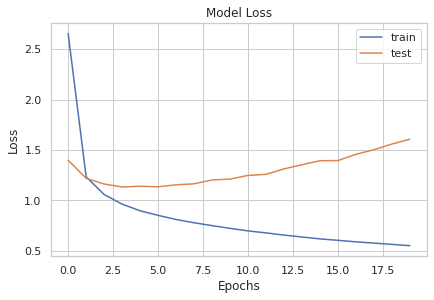

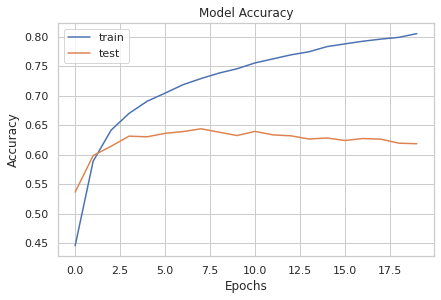

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Problem 2(a)

Add on your own last layers to the pretrained model and train it on the training data. You can increase (or decrease) the number of nodes per layer, increase (or decrease) the number of layers, and add dropout if your model is overfitting, change the hyperparameters, change your optimizer, etc. Try to get the validation accuracy higher than our example transfer learning model (shown above) was able to obtain, and try to minimize the amount of overfitting.

In [0]:
base_model = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (32, 32, 3), 
                   pooling = None)

x = base_model.output
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(96, activation = 'relu')(x)

x = Dense(96, activation = 'relu')(x)
#x = BatchNormalization()(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(96, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.5)(x)




predic = Dense(10, activation = 'softmax')(x) 

# And now put this all together to create our new model.
model = Model(inputs = base_model.input, outputs = predic) 
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [0]:
# Compile the model.

model.compile(optimizer = Adam(lr = 0.001),
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [0]:
epochs = 20 ### Leave the epochs at 20 ###

batchsize =200

# Train the model

history = model.fit(X, 
                    y,
                    batch_size = batchsize,
                    epochs = epochs, 
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/20
200/200 [==============================] - 10s 51ms/step - loss: 2.4235 - accuracy: 0.1112 - val_loss: 2.2517 - val_accuracy: 0.1714
Epoch 2/20
200/200 [==============================] - 10s 50ms/step - loss: 2.0919 - accuracy: 0.1719 - val_loss: 1.9003 - val_accuracy: 0.2062
Epoch 3/20
200/200 [==============================] - 10s 50ms/step - loss: 1.9358 - accuracy: 0.2003 - val_loss: 1.8244 - val_accuracy: 0.2514
Epoch 4/20
200/200 [==============================] - 10s 50ms/step - loss: 1.8504 - accuracy: 0.2375 - val_loss: 1.7900 - val_accuracy: 0.2716
Epoch 5/20
200/200 [==============================] - 10s 50ms/step - loss: 1.7856 - accuracy: 0.2648 - val_loss: 1.7269 - val_accuracy: 0.3103
Epoch 6/20
200/200 [==============================] - 10s 50ms/step - loss: 1.6750 - accuracy: 0.3179 - val_loss: 1.5616 - val_accuracy: 0.3639
Epoch 7/20
200/200 [==============================] - 10s 50ms/step - loss: 1.5264 - accuracy: 0.3909 - val_loss: 1.3777 - val_accuracy:

### Problem 2(b)

Create training and validation loss and accuracy plots for this model.


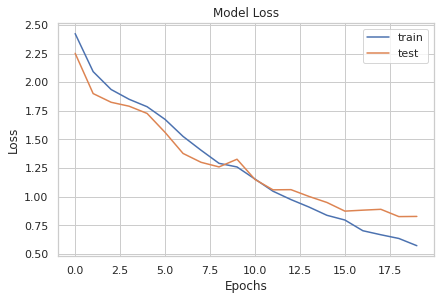

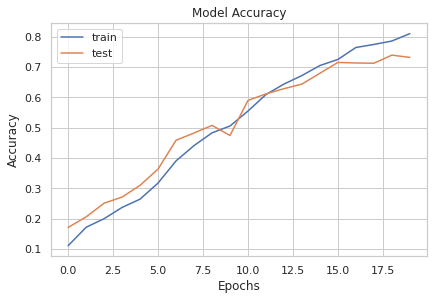

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Problem 2 (c)

- What did you add in your transfer learning model after the VGG16 portion? 

- What did you try that didn't work?

- What optimizer and hyperparameters did you go with and why?

- How much did it improve over the example transfer learning model we provided?


I added in more dense layers using 'relu' activation. I also used RMSprop at first, but there was a lot of underfitting and the training loss for the epoch 1 was at 4.6, while the validation loss was around 1.5. This made the training data underfit a lot at epoch 1. Moreover, the validation loss did not reduce as much as the training data. It also caused some of the training losses to fluctuate and there were a couple points on the training loss that were outliers. Therefore, I changed the optimizer to Adam. This fixed the the outliers in the data. And since the hyperparameters required little tuning, Adam was a better optimizer. So, there was a smaller difference between the training and validation loss points and they follow a similar pattern. 

I first added in batch normalization, which did not work that well, since it caused some of the training losses to fluctuate a lot for some of the points and it also caused outliers in the data points. For one of the epochs, the validation loss increased sharply, and then decreased sharply on the next epoch. I also realized batch normalization did not reduce over/underfitting as much as changing the optimizer to Adam did, so I did not use batch normalization. When I used RMSprop, I also originally only had one dropout layer at 0.5, since having 2 dropout layers made the validation accuracy stay at 0.09. Once I changed my optimizer to Adam, I noticed that adding in more dropout layers helped.

 I was easily able to get the accuracy to be over 70, but the issue was the outliers in the data point,as well as the underfitting and overfitting. Therefore, I had to tune my parameters to prevent this. The biggest way to fix this, especially with preventing my data from underfitting or overfitting, was changing my optimizer to use Adam. My final validation accuracy was around 73. 
 

### Problem 2 (d)

Does your final model show signs of underfitting or overfitting? Explain why you think so.



**YOUR ANSWER**
My final model does not show big signs of underfitting or overfitting. This is because the training loss and validation loss are very similar. And the training accuracy and validation accuracy are very similar. The losses both decrease the entire time. The accuracies both increase the entire time. And their slopes are similar. On the first epoch, the validation loss starts slightly lower than the training loss. And the validation accuracy is slightly higher than the training loss. At around epoch 8 to 10, the losses and accuracies are similar. And then for the second half of the epochs (10-20), there is slight overfitting where the training loss is higher than the validation loss. And the validation accuracy is lower than than the training accuracy. The graph in 2b)shows less overfitting than the initialize graph, since the training and accuracy values have a smaller difference. Most of my focus for 2a) was making sure that my final model was not overfitting or underfitting, since the validation accuracies were usually high enough. 